### Trabalho para disciplina Inteligência Computacional 2018-1

In [2]:
#Perceptron aplicado a um dataset de flores da espécie iris
#Gabriel Augusto Ferraz Martins
# -*- coding: utf-8 -*-

In [3]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import display
import seaborn as sns
sns.set()

#### Explorando o dataset e checando se o problema é linearmente separável

In [5]:
iris = pd.read_csv('Iris.csv')
display(iris.head(5))


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


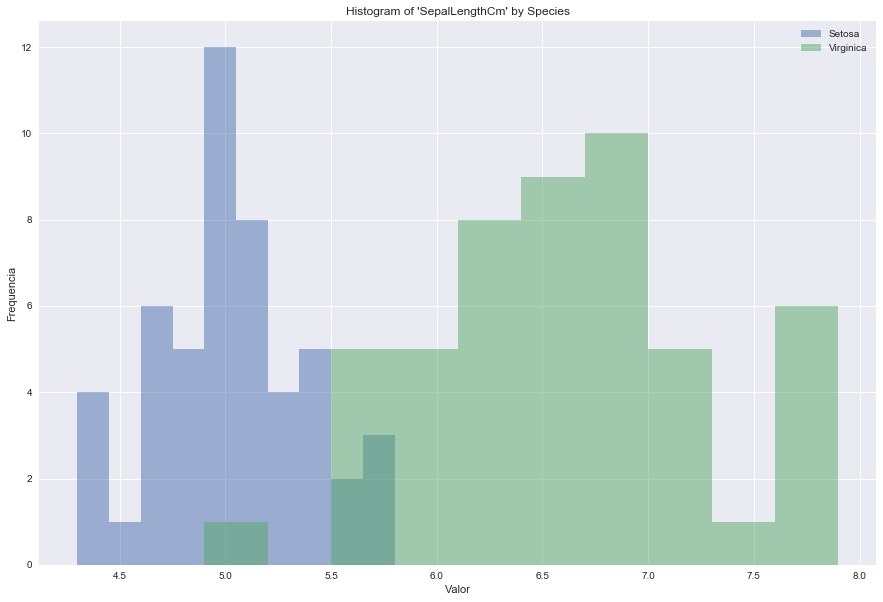

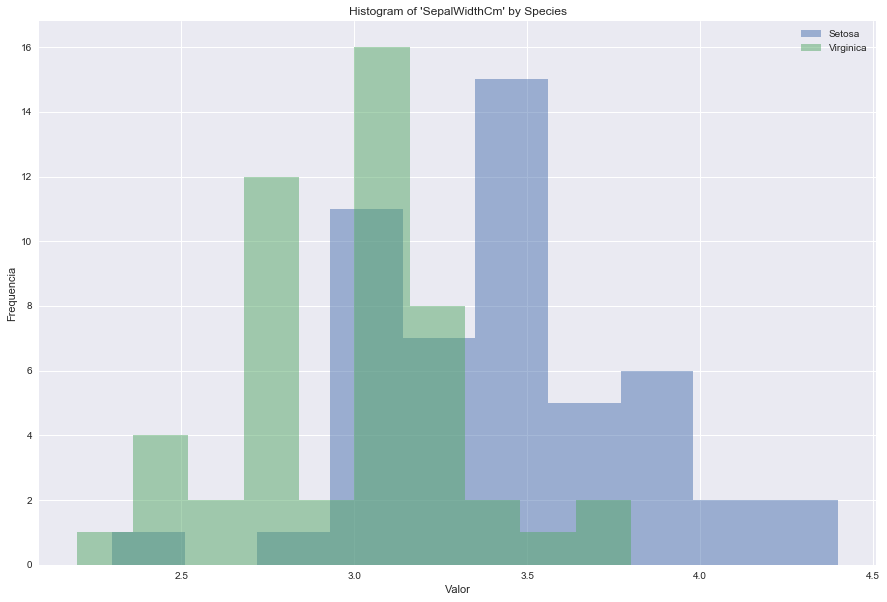

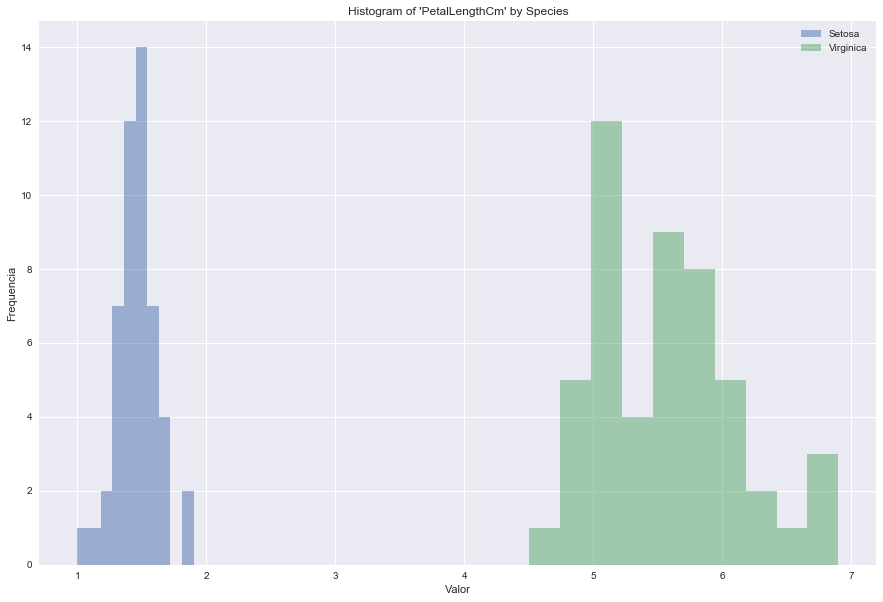

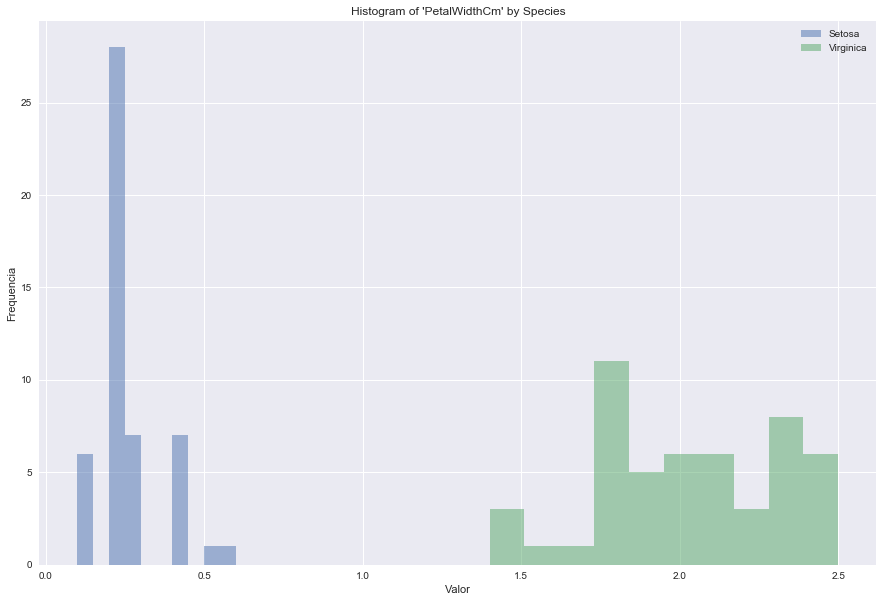

In [6]:
def plot_histogram_dv(feature,labels):
    plt.figure(figsize=(15,10))
    plt.hist(list(feature[labels=='Iris-setosa']), alpha=0.5, label='Setosa')
    plt.hist(list(feature[labels=='Iris-virginica']), alpha=0.5, label='Virginica')
    plt.title("Histogram of '{var_name}' by Species".format(var_name=feature.name))
    plt.xlabel("Valor")
    plt.ylabel("Frequencia")
    plt.legend(loc="upper right")
    plt.show()
    
plot_histogram_dv(iris['SepalLengthCm'], iris['Species'])
plot_histogram_dv(iris['SepalWidthCm'], iris['Species'])
plot_histogram_dv(iris['PetalLengthCm'], iris['Species'])
plot_histogram_dv(iris['PetalWidthCm'], iris['Species'])

###### Dividindo o dataset em 80% para treino e 20% para testes de performance e métricas de acerto

In [7]:
#randomizando ordem de linhas no dataframe
iris = iris.sample(frac=1).reset_index(drop=True)

#calculando tamanho do dataset e indice do corte
iris_len = len(iris)
iris_split_size = int(iris_len * 0.8)

#Retirando labels dos datasets para input no perceptron
iris_train = iris[:iris_split_size].drop(['Species'], axis=1)
iris_test = iris[iris_split_size:].drop(['Species'], axis=1)

#criando array de labels
labels_train = iris[:iris_split_size]['Species']
labels_test = iris[iris_split_size:]['Species']

display(iris_test.head(5))
display(labels_test.head(5))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
120,135,6.1,2.6,5.6,1.4
121,106,7.6,3.0,6.6,2.1
122,78,6.7,3.0,5.0,1.7
123,93,5.8,2.6,4.0,1.2
124,1,5.1,3.5,1.4,0.2


120     Iris-virginica
121     Iris-virginica
122    Iris-versicolor
123    Iris-versicolor
124        Iris-setosa
Name: Species, dtype: object

###### Função sigmóide

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))


###### Criando loop para treino de pesos

In [ ]:
learning_rate = 0.2
costs = []

#pesos e bias aleatório
w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
w4 = np.random.randn()
b = np.random.randn()

#Criando um numpy array apenas com os valores de cada feature
data = iris_train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
labels = []

#Definindo as labels como 0 ou 1
#Iris-Versicolor = 1
#Iris-Virginica = 0
for label in labels_train:
    if label == 'Iris-versicolor':
        labels.append(1)
    else:
        labels.append(0)

        
repetitions = 100000000

for i in range(0, repetitions):
    #Escolhendo um ponto aleatorio do dataset a cada iteracao
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 +b
    prediction = sigmoid(z)
    target = labels[ri]
    
    #Funcao de custo
    cost = np.square(prediction - target)
    
    #Derivada da funcao de custo
    dcost_prediction = 2 * (prediction - target)
    
    #Sigmoid_p e a derivada da sigmoid, aplicando ao resultado dos pesos
    dprediction_dz = sigmoid_p(z)
    
    #Dados de input e colocando 1 como valor de bias
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_dw4 = point[3]
    dz_db = 1
    
    #A curva da funcao de custo
    dcost_dz = dcost_prediction * dprediction_dz
    
    #As curvas dos pesos e do bias
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_dw4 = dcost_dz * dz_dw4
    dcost_db = dcost_dz * dz_db
    
    #Calculando novos pesos e valor do bias
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    w4 = w4 - learning_rate * dcost_dw4
    b = b - learning_rate * dcost_db
    
    #Fazendo o gráfico para apresentacao das iteracoes
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point [0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
            prediction = sigmoid(z)
            
            target = labels[ri]
            cost_sum += np.square(prediction - target)
        costs.append(cost_sum/len(data))
    
plt.plot(costs)
    

    


In [ ]:
data = data = iris_test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
labels = []
for label in labels_test:
    if label == 'Iris-versicolor':
        labels.append(1)
    else:
        labels.append(0)

for i in range(len(data)):
    point = data[i]
    display(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + point[3] * w4 + b
    prediction = sigmoid(z)
    target = labels[4]
    
    print("Resposta : {}".format(prediction))
